In [1]:
import numpy as np 
import pandas as pd
from PyTcgpr import TCGPR


████████╗ ██████╗ ██████╗ ██████╗ ██████╗ 
╚══██╔══╝██╔════╝██╔════╝ ██╔══██╗██╔══██╗
   ██║   ██║     ██║  ███╗██████╔╝██████╔╝
   ██║   ██║     ██║   ██║██╔═══╝ ██╔══██╗
   ██║   ╚██████╗╚██████╔╝██║     ██║  ██║
   ╚═╝    ╚═════╝ ╚═════╝ ╚═╝     ╚═╝  ╚═╝

Screening Abnormal Data and Important features for Small DataSet
TCGPR, Bin Cao, Advanced Materials Thrust, HKUST(GZ)
Intro : https://github.com/Bin-Cao/TCGPR/blob/main/Intro/TCGPR.pdf
URL : https://github.com/Bin-Cao/TCGPR
DOI : https://doi.org/10.1038/s41524-023-01150-0 (npj Comput Mater)
Executed on : 2023-11-08 18:27:59  | Have a great day.




# Data Screening or Partition

## generating data

In [34]:
from scipy.stats import multivariate_normal

def calculate_multivariate_normal_pdf(point, mean, cov_matrix):
    mvn = multivariate_normal(mean=mean, cov=cov_matrix)
    pdf = mvn.pdf(point)
    
    return pdf


In [113]:
import numpy as np


mean_1 = [0, 0,]
cov_matrix_1 = np.array([[1, 0.5,],
                       [0.5, 1],])

mean_2 = [1, 1,]
cov_matrix_2 = np.array([[1, 0.1],
                       [0.1, 1],])

num_samples = 10 
samples_1 = np.random.multivariate_normal(mean_1, cov_matrix_1, num_samples)
samples_2 = np.random.multivariate_normal(mean_2, cov_matrix_2, num_samples)


label_1 = calculate_multivariate_normal_pdf(samples_1,mean_1, cov_matrix_1)
label_2 = calculate_multivariate_normal_pdf(samples_2,mean_2, cov_matrix_2)


# Create a Pandas DataFrame
df = pd.DataFrame({
    'Feature_1': np.concatenate((samples_1[:, 0], samples_2[:, 0])),
    'Feature_2': np.concatenate((samples_1[:, 1], samples_2[:, 1])),
    'Label': np.concatenate((label_1, label_2))
})

In [119]:
df.head()

,Feature_1,Feature_2,Label
0,0.265509,1.091482,0.096130
1,1.286303,1.034703,0.072546
2,-1.805066,-1.796380,0.021156
3,0.783438,-0.061829,0.117883
4,2.668764,2.264476,0.002932


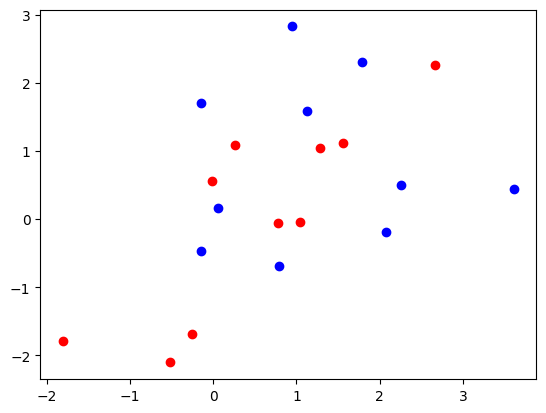

In [115]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:10,0], df.iloc[:10,1],c='r')
plt.scatter(df.iloc[10:,0], df.iloc[10:,1],c='b')

plt.show()

In [116]:
df.to_csv('data.csv',index=None)

In [117]:
dataSet = 'data.csv'
initial_set_cap = [0,1,2]
sampling_cap = 2
up_search = 500
CV = 'LOOCV'
Task = 'Partition'
TCGPR.fit(
    filePath = dataSet, initial_set_cap = initial_set_cap,Task=Task, sampling_cap = sampling_cap,
    up_search = up_search, CV=CV,ratio=0.0
        )
# note: default setting of Mission = 'DATA', No need to declare

Leave one out cross validation is applied in TCGPR
Execution of TCGPR : Dataset Partition Module
THE specific Initial dataset is 
    Feature_1  Feature_2     Label
0   0.265509   1.091482  0.096130
1   1.286303   1.034703  0.072546
2  -1.805066  -1.796380  0.021156
----------------------------------------------------------------------------------------------------
The input sampling_cap is 2
The algorithm will searching all candidates by brute force searching
1-th iteration : The newly added data are
[-0.52252722 -2.10655739  0.0165623 ]
[ 2.07168455 -0.18768336  0.0386235 ]
The algorithm will searching all candidates by brute force searching
2-th iteration : The newly added data are
[0.06426711 0.15376657 0.07755564]
[3.60834046 0.43265161 0.00376887]
The algorithm will searching all candidates by brute force searching
****************************************************************************************************
The dataset after data screening is : 
    Feature_1  Feature_2   

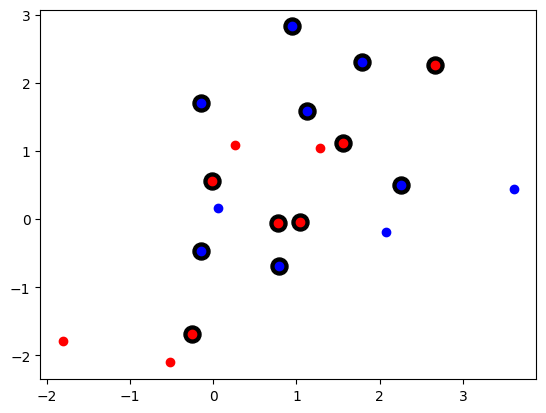

In [118]:
df_tcgpr = pd.read_csv('Dataset remained by TCGPR.csv')
plt.scatter(df_tcgpr.iloc[:,0], df_tcgpr.iloc[:,1],marker='o',c='k', s=150)

plt.scatter(df.iloc[:10,0], df.iloc[:10,1],c='r')
plt.scatter(df.iloc[10:,0], df.iloc[10:,1],c='b')

plt.show()